In [1]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [2]:
normal_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Normal"
stroke_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Stroke"

In [3]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [4]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [5]:
normal_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Normal"
stroke_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [6]:
len(data)

2501

In [7]:
data[0].shape

(224, 224, 3)

In [8]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [9]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [10]:
Target_label = normal_label + stroke_label

In [11]:
len(Target_label)

2501

In [12]:
x = np.array(data)
y = np.array(Target_label)

In [13]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


In [16]:
x_train = np.array(x_train) / 255

In [17]:
x_test=np.array(x_test)/255


In [18]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (2250, 224, 224, 3)
y_train: (2250,)
x_test: (251, 224, 224, 3)
y_test: (251,)


In [19]:
x_train = np.array(x_train).reshape(2250,224,224, 3)


In [20]:
x_test = np.array(x_test).reshape(251,224,224, 3)

In [21]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (2250, 224, 224, 3)
y_train: (2250,)
x_test: (251, 224, 224, 3)
y_test: (251,)


In [22]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import layers, optimizers, losses, metrics, callbacks, initializers

In [24]:
# checkpoint = callbacks.ModelCheckpoint(
#     filepath='stroke.h5',
#     monitor='val_accuracy',
#     verbose=1,
#     save_best_only=True,
#     mode = 'max')

In [25]:
history = model.fit(x_train,y_train,batch_size=32,
         epochs=7, validation_data=(x_test,y_test))

Epoch 1/7
71/71 [==============================] - 247s 3s/step - loss: 0.6294 - accuracy: 0.6756 - val_loss: 0.5072 - val_accuracy: 0.7331
Epoch 2/7
71/71 [==============================] - 200s 3s/step - loss: 0.2972 - accuracy: 0.8760 - val_loss: 0.1239 - val_accuracy: 0.9402
Epoch 3/7
71/71 [==============================] - 198s 3s/step - loss: 0.1081 - accuracy: 0.9538 - val_loss: 0.1182 - val_accuracy: 0.9562
Epoch 4/7
71/71 [==============================] - 195s 3s/step - loss: 0.0425 - accuracy: 0.9831 - val_loss: 0.0944 - val_accuracy: 0.9721
Epoch 5/7
71/71 [==============================] - 193s 3s/step - loss: 0.0387 - accuracy: 0.9853 - val_loss: 0.0628 - val_accuracy: 0.9761
Epoch 6/7
71/71 [==============================] - 193s 3s/step - loss: 0.0311 - accuracy: 0.9876 - val_loss: 0.1175 - val_accuracy: 0.9721
Epoch 7/7
71/71 [==============================] - 194s 3s/step - loss: 0.0073 - accuracy: 0.9964 - val_loss: 0.1172 - val_accuracy: 0.9801


In [26]:
model.save('stroke.h5')




c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


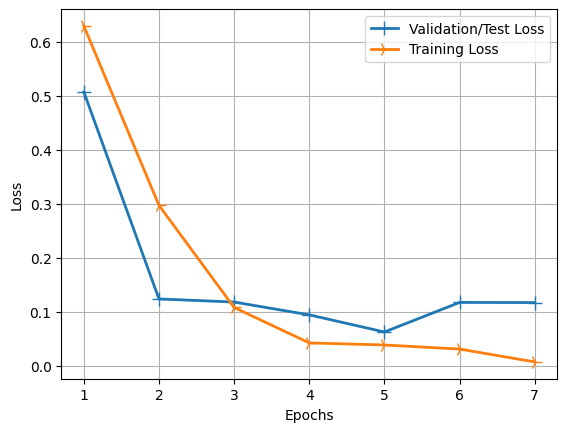

In [27]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

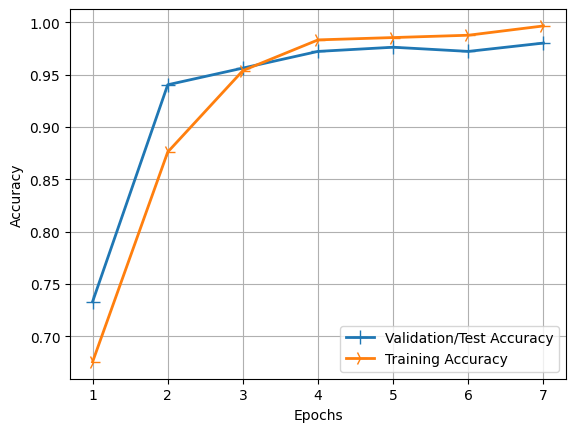

In [28]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
loss, acc = model.evaluate(x_test,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 5s 605ms/step - loss: 0.1172 - accuracy: 0.9801
Loss on Test Data: 0.11722218245267868
Accuracy on Test Data: 0.980079710483551
71/71 [==============================] - 53s 601ms/step - loss: 0.0017 - accuracy: 0.9996
Loss on Train Data: 0.0017052748007699847
Accuracy on Train Data: 0.9995555281639099


In [34]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Normal','Stroke']))

8/8 [==============================] - 5s 609ms/step
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98       161
      Stroke       1.00      0.94      0.97        90

    accuracy                           0.98       251
   macro avg       0.98      0.97      0.98       251
weighted avg       0.98      0.98      0.98       251



In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=pred)

In [39]:
cm_plot_labels = ['Normal','Stroke']

Confusion matrix, without normalization
[[161   0]
 [  5  85]]


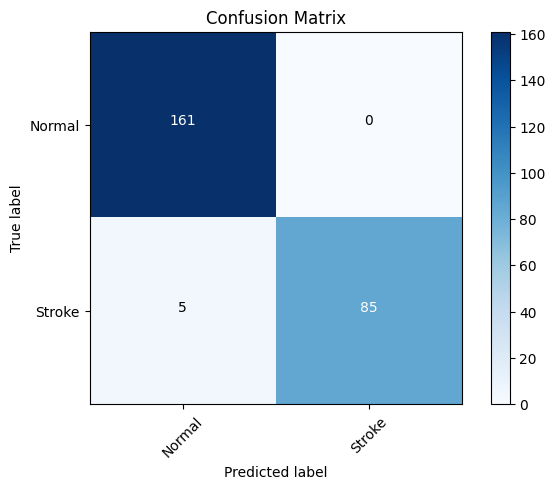

In [40]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
 

In [41]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test,pred, average='micro')
print('F-Measure: %.3f' % score)

Accuracy: 0.980
Precision: 1.000
Recall: 0.980
F-Measure: 0.980
